<a href="https://colab.research.google.com/github/ahyen/ML-assignment/blob/master/Assginment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd ../content/drive/My Drive/Colab Notebooks/ML

/content/drive/My Drive/Colab Notebooks/ML


In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

x  = data[:, 0]
y  = data[:, 1]
label   = data[:, 2]

pointX0 = x[label == 0]
pointY0 = y[label == 0]

pointX1 = x[label == 1]
pointY1 = y[label == 1]

In [0]:
#define function for estimate training accuracy
def accuracy(sigmoid) : 
  label_z = []
  for i in sigmoid:
    if i > 0.5:
      i = 1
    else : i = 0
    label_z.append(i)

  correct = 0
  for i, j in zip(label_z, label):
    if i ==j:
      correct +=1
  return correct/len(label)

In [144]:
np.random.seed(50)
theta0 = np.random.randn(1)
theta1 = np.random.randn(1)
theta2 = np.random.randn(1)
theta3 = np.random.randn(1)
theta4 = np.random.randn(1)
theta5 = np.random.randn(1)
theta6 = np.random.randn(1)
theta7 = np.random.randn(1)

cost_list = []
accuracy_list = []
theta0_list = []
theta1_list = []
theta2_list = []
theta3_list = []
theta4_list = []
theta5_list = []
theta6_list = []
theta7_list = []

alpha = 0.1
iteration = 100000


for i in range(iteration):

  theta0_list.append(theta0)
  theta1_list.append(theta1)
  theta2_list.append(theta2)
  theta3_list.append(theta3)
  theta4_list.append(theta4)
  theta5_list.append(theta5)
  theta6_list.append(theta6)


  #hypothesis
  z = theta0 + theta1*x +theta2*y + theta3*x*y + theta4*x*x + theta5*y*y + theta6*x*x*y*y
  sigmoid_z = 1/(1 + np.exp(-z))
  error = sigmoid_z - label
  accuracy_list.append(accuracy(sigmoid_z))
  #objective function
  cost = (-label * np.log(sigmoid_z) - (1 - label) * np.log(1 - sigmoid_z)).mean()
  cost_list.append(cost)

  #gradient descent
  theta0_grad = error.mean()
  theta1_grad = (error * x).mean()
  theta2_grad = (error * y).mean()
  theta3_grad = (error * x * y).mean()
  theta4_grad = (error * x * x).mean()
  theta5_grad = (error * y * y).mean()
  theta6_grad = (error * x * x * y * y).mean()

  
  theta0 = theta0 - alpha * (theta0_grad)
  theta1 = theta1 - alpha * (theta1_grad)
  theta2 = theta2 - alpha * (theta2_grad)
  theta3 = theta3 - alpha * (theta3_grad)
  theta4 = theta4 - alpha * (theta4_grad)
  theta5 = theta5 - alpha * (theta5_grad)
  theta6 = theta6 - alpha * (theta6_grad)

print(theta0, theta1, theta2, theta3, theta4, theta5, theta6)

[5.18722329] [3.25107332] [4.15928044] [-7.45201235] [-12.17361494] [-11.92964906] [1.15552436]




---

# **Result**

## 1. Plot the training data

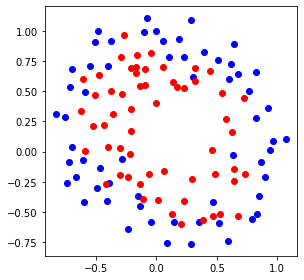

In [169]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 2. High dimensional function 

$$g(x, y;\theta) =  = \theta_0 + \theta_1x + \theta_2y + \theta_3xy + \theta_4x^2 + \theta_5 y^2+ \theta_6x^2y^2$$ 

# 3. Plot the training error

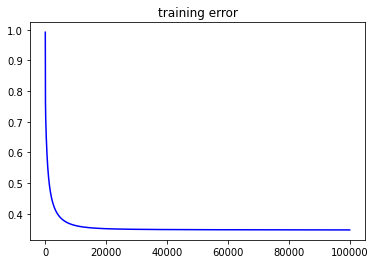

In [145]:
#plot the value of the objective function at every optimization step
plt.plot(range(0, iteration), cost_list, 'blue')
plt.title('training error')
plt.show()

#4. Plot the training accuracy

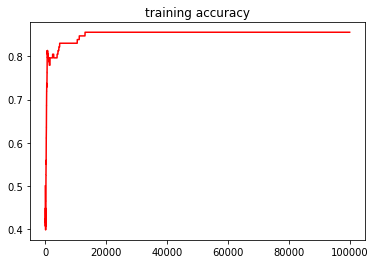

0.8559322033898306


In [146]:
plt.plot(range(0, iteration), accuracy_list, 'red')
plt.title('training accuracy')
plt.show()
print(accuracy_list[iteration-1])

#5. Final training accuracy

###85.59%



#6. Plot the optimal classifier superimposed on the training data

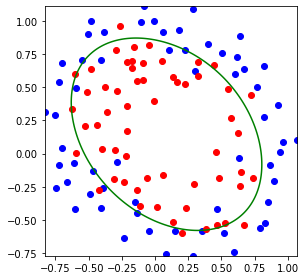

In [167]:
plt.figure()

grid_size = 500
A, B = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), grid_size),
                   np.linspace(data[:, 1].min(), data[:, 1].max(), grid_size))
z = theta0 + theta1*A + theta2*B + theta3*A*B + theta4*A*A + theta5*B*B + theta6*A*A*B*B

plt.contour(A, B, z, 0, colors = 'green')
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()